In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [41]:
restaurants_df = pd.read_excel(r'restaurants_clean_encoded.xlsx')

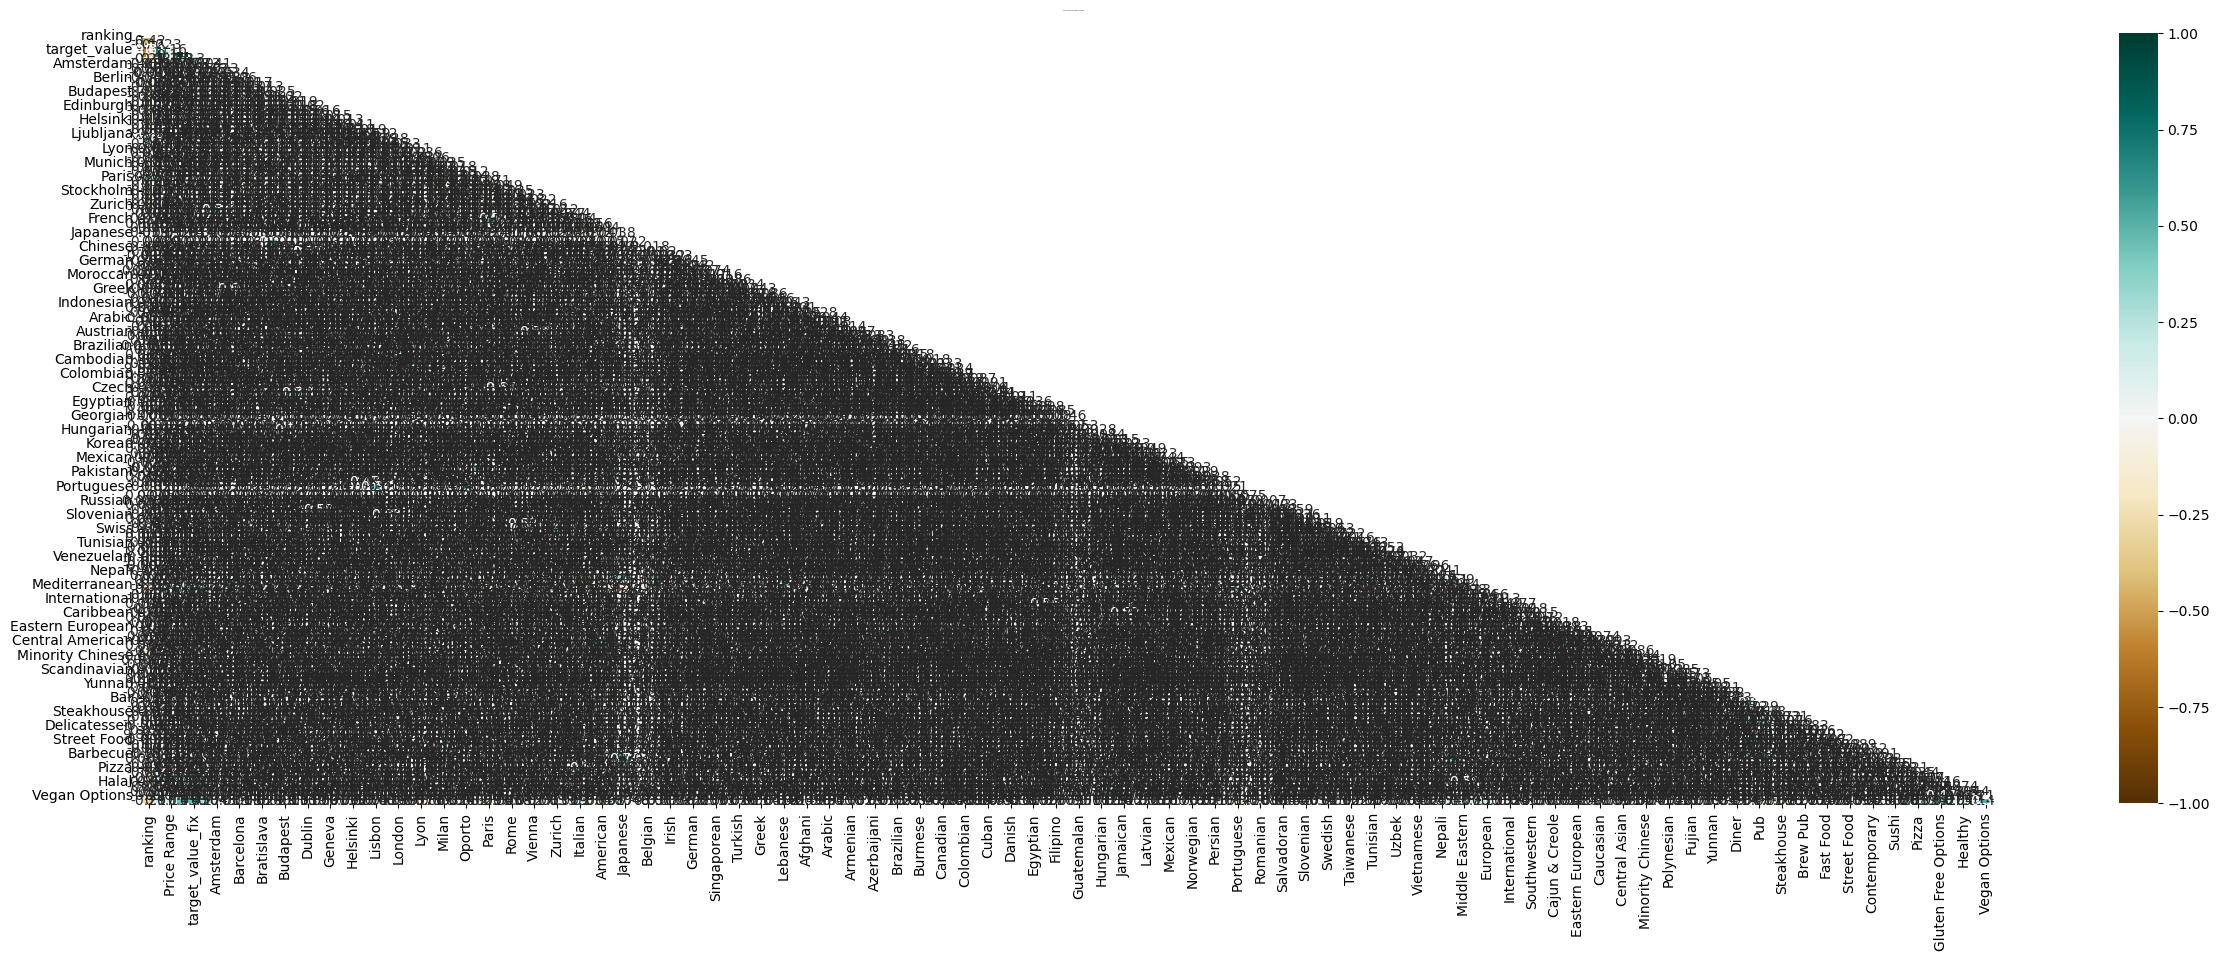

In [42]:
plt.figure(figsize=(30, 10))
mask = np.triu(np.ones_like(restaurants_df.corr(), dtype='bool'))
heatmap = sns.heatmap(restaurants_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':1}, pad=16);

In [43]:
restaurants_df.corr()

ranking    rating  Price Range  target_value  \
ranking              1.000000 -0.416943    -0.110231     -0.611646   
rating              -0.416943  1.000000    -0.022900      0.708450   
Price Range         -0.110231 -0.022900     1.000000      0.155682   
target_value        -0.611646  0.708450     0.155682      1.000000   
target_value_fix    -0.611646  0.708450     0.155682      1.000000   
...                       ...       ...          ...           ...   
Halal                0.068845  0.005144    -0.034505      0.009319   
Healthy             -0.014134  0.068019    -0.041613      0.025621   
Kosher               0.017659 -0.007414     0.002602     -0.008237   
Vegan Options       -0.216352  0.167546     0.048190      0.350119   
Vegetarian Friendly -0.292102  0.171467     0.127887      0.450465   

                     target_value_fix  Number of Reviews  Amsterdam    Athens  \
ranking                     -0.611646          -0.210401  -0.089065 -0.085648   
rating                       0.708450           0.024186   0.035021  0.047968   
Price Range                  0.155682           0.162342   0.007798 -0.031050   
target_value                 1.000000           0.302613  -0.007270  0.015360   
target_value_fix             1.000000           0.302613  -0.007270  0.015360   
...                               ...                ...        ...       ...   
Halal                        0.009319          -0.011237  -0.003948 -0.014098   
Healthy                      0.025621          -0.022042   0.014660 -0.001413   
Kosher                      -0.008237           0.010075  -0.001523 -0.003272   
Vegan Options                0.350119           0.266750   0.022503  0.026438   
Vegetarian Friendly          0.450465           0.273515   0.045001 -0.013293   

                     Barcelona    Berlin  ...     Sushi     Soups     Pizza  \
ranking               0.010258 -0.043916  ...  0.001399 -0.049480 -0.011275   
rating               -0.000633  0.048804  ... -0.030103  0.028776 -0.053468   
Price Range          -0.019362 -0.033952  ...  0.047483 -0.030388 -0.061601   
target_value          0.002398  0.040905  ... -0.019950  0.049387 -0.045031   
target_value_fix      0.002398  0.040905  ... -0.019950  0.049387 -0.045031   
...                        ...       ...  ...       ...       ...       ...   
Halal                -0.016968 -0.002222  ... -0.029598 -0.018868 -0.039522   
Healthy               0.033225 -0.005123  ... -0.010802  0.062370 -0.029645   
Kosher               -0.008631  0.002929  ...  0.000276  0.010885 -0.003083   
Vegan Options         0.020936  0.006994  ...  0.003803  0.067117  0.056662   
Vegetarian Friendly  -0.017951  0.034514  ...  0.008772  0.064688  0.089492   

                       Fusion  Gluten Free Options     Halal   Healthy  \
ranking             -0.032840            -0.222218  0.068845 -0.014134   
rating               0.043082             0.135449  0.005144  0.068019   
Price Range          0.049224             0.204001 -0.034505 -0.041613   
target_value         0.047789             0.368368  0.009319  0.025621   
target_value_fix     0.047789             0.368368  0.009319  0.025621   
...                       ...                  ...       ...       ...   
Halal               -0.014111             0.016102  1.000000 -0.007416   
Healthy              0.032368             0.052619 -0.007416  1.000000   
Kosher              -0.004605             0.001297 -0.002466 -0.004383   
Vegan Options        0.045597             0.468830  0.076935  0.089189   
Vegetarian Friendly  0.033342             0.416066  0.075280  0.042253   

                       Kosher  Vegan Options  Vegetarian Friendly  
ranking              0.017659      -0.216352            -0.292102  
rating              -0.007414       0.167546             0.171467  
Price Range          0.002602       0.048190             0.127887  
target_value        -0.008237       0.350119             0.450465  
target_value_fix    -0.008237 

In [44]:
restaurants2_df = restaurants_df.drop(columns=['Cuisine Style', 'target_value', 'Reviews', 'Number of Reviews', 'ranking', 'rating','city','name'])

In [45]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [46]:
X = restaurants2_df.drop('target_value_fix', axis=1)
y = restaurants2_df.target_value_fix

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

Price Range  Amsterdam  Athens  Barcelona  Berlin  Bratislava  \
31364            2          0       0          0       0           0   
34775            2          0       0          0       0           0   
48526            1          0       0          0       0           0   
6900             2          0       0          1       0           0   
37164            2          0       0          0       0           0   

       Brussels  Budapest  Copenhagen  Dublin  ...  Sushi  Soups  Pizza  \
31364         0         0           0       0  ...      0      0      0   
34775         0         0           0       0  ...      0      0      0   
48526         0         0           0       0  ...      0      0      0   
6900          0         0           0       0  ...      0      0      0   
37164         0         0           0       0  ...      0      0      0   

       Fusion  Gluten Free Options  Halal  Healthy  Kosher  Vegan Options  \
31364       0                    0      1        0       0              0   
34775       0                    0      1        0       0              1   
48526       0                    0      0        0       0              1   
6900        0                    0      0        0       0              0   
37164       0                    1      0        0       0              1   

       Vegetarian Friendly  
31364                    0  
34775                    1  
48526                    1  
6900                     0  
37164                    1  

[5 rows x 159 columns]

In [52]:
print(X_train.shape)
print(X_test.shape)

(51957, 159)
(22268, 159)


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(51957, 159)
(22268, 159)


In [50]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled)
print_model = model.summary()
print(print_model)

ValueError: shapes (22268,159) and (160,) not aligned: 159 (dim 1) != 160 (dim 0)

In [51]:
print(X_train_const_scaled.shape)
print(X_test_const_scaled.shape)

(51957, 160)
(22268, 159)


In [29]:
model=LinearRegression() 
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
model.coef_

array([ 2.44771654e-02,  7.76290366e+10,  5.49164061e+10,  1.10530910e+11,
        9.21200919e+10,  3.26299275e+10,  7.14584892e+10,  6.33601127e+10,
        5.68264255e+10,  6.01010275e+10,  5.93304901e+10,  4.95833124e+10,
        5.56888250e+10,  4.28957251e+10,  4.60546156e+10,  7.76733306e+10,
        2.90261716e+10,  1.59340301e+11,  3.31826318e+10,  5.92408851e+10,
        1.06377837e+11,  9.60728979e+10,  6.41878874e+10,  5.05490699e+10,
        4.40568788e+10,  1.44307916e+11,  7.88367467e+10,  1.05649365e+11,
        5.86095094e+10,  7.13123363e+10,  5.60073074e+10,  5.17726889e+10,
        2.90737152e-02,  2.65121460e-03,  8.51716995e-02,  5.27191162e-03,
       -5.37986755e-02,  2.19879150e-02,  5.49945889e+11,  1.66511536e-02,
       -4.81090546e-02,  3.92780304e-02,  2.40659714e-03,  1.16329193e-02,
       -1.48086548e-02,  7.85064697e-03, -2.53009796e-03, -8.43811035e-03,
       -1.59692764e-03,  1.35641098e-02,  1.30767822e-02, -1.81541443e-02,
        5.23567200e-03,  

In [31]:
model.intercept_

2.6319579411447744

In [32]:
y_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['target_value_fix'] )
y_pred_train =  pd.DataFrame(model.predict(X_train_scaled),columns = ['target_value_fix'])

In [33]:
R2=r2_score(y_test,y_pred)
R2

0.3247760478886197